<a href="https://colab.research.google.com/github/berbonilla/Bayad-Ho-/blob/main/Excercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns
import re
import os, types
import advertools as adv
adv.stopwords.keys()
adv.stopwords['tagalog']

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

In [3]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

In [5]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

In [60]:
document1 = splits

{'train': 'unique_train_dataset.csv',
 'validation': 'unique_validation_dataset.csv',
 'test': 'unique_test_dataset.csv'}

In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(document1)
count_array = count_vectorizer.transform(document1).toarray()
count_array

In [70]:
filo_trashtalk = df_train
filo_trashtalk

,text,label,target,duplicates
0,Presidential candidate Mar Roxas implies that ...,1,0,0
1,Parang may mali na sumunod ang patalastas ng N...,1,0,0
2,Bet ko. Pula Ang Kulay Ng Posas,1,0,0
3,[USERNAME] kakampink,0,0,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1,0,0
...,...,...,...,...
21768,Marcos Talunan Marcos Magnanakaw,1,0,0
21769,Grabe kayo kay binay ??????????,0,0,0
21770,[USERNAME] Cnu ba naman ang hindImabibighani s...,0,0,0
21771,RT [USERNAME]: Tabi tabi yung mga nagsasabing ...,1,0,0


In [75]:
count_vectorizer = CountVectorizer() # CountVectorizer has 'lowercase = True' as a default parameter
count_vectorizer.fit(filo_trashtalk)
count_array = count_vectorizer.transform(document1).toarray()
count_array

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [74]:
sentences = filo_trashtalk["text"]
data1 = pd.DataFrame(sentences, columns=["sentences"])
data1

,sentences


In [68]:
# converting to lowercase
data1["sentences"] = data1["sentences"].str.lower()

# Removing stopwords from the data
stop_words = stopwords.words("english")
data1["sentences"] = data1["sentences"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

# applying lemmatization
wnl = WordNetLemmatizer()
data1["sentences"] = data1["sentences"].apply(lambda x: " ".join(wnl.lemmatize(word, "v") for word in x.split()))

data1

,sentences
0,maaaring
1,pagkatapos
2,hanggang
3,kulang
4,sarili
...,...
142,din
143,iba
144,gayunman
145,pagkakaroon


In [50]:
X_train = filo_trashtalk["text"]
X_test = df_test["text"]
Y_train = filo_trashtalk["label"]
Y_test = df_test["label"]

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english',max_df=0.5)

#fitting train data and then transforming it to count matrix#fitting
X_train_transformed = vect.fit_transform(X_train)
#print(x_train)

#transforming the test data into the count matrix initiated for train data
X_test_transformed = vect.transform(X_test)

In [55]:
# importing naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#fitting the model into train data
nb.fit(X_train_transformed, Y_train)

#predicting the model on train and test data
y_pred_test = nb.predict(X_test_transformed)
y_pred_train = nb.predict(X_train_transformed)

In [40]:
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n","",text)   #remove line breaks
    text = text.lower() #convert to lowercase
    text = re.sub(r"\d+","",text)   #remove digits and currencies
    text = re.sub(r'[\$\d+\d+\$]', "", text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   #remove dates
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)   #remove non-ascii
    text = re.sub(r'[^\w\s]','',text)   #remove punctuation
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   #remove hyperlinks

    #remove stop words
    if rm_stop == True:
        filtered_tokens = [word for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)

    #lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        return " ".join(lemm_tokens)

    #stemming
    if method == 'S':
        porter = PorterStemmer()
        stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
        return " ".join(stem_tokens)

    return text

In [41]:
#preprocessed data: Lemm + stopword removal
preprocessed_text_1 = [text_clean(text, 'L', True) for text in X_train]

#preprocessed data: Lemm + no stopword removal
preprocessed_text_2 = [text_clean(text, 'L', False) for text in X_train]

In [42]:
#preprocessed data: Stem + stopword removal
preprocessed_text_3 = [text_clean(text, 'S', True) for text in X_train]

#preprocessed data: Stem + no stopword removal
preprocessed_text_4 = [text_clean(text, 'S', False) for text in X_train]

In [43]:
def transform_model_data_w_count_vectorizer(preprocessed_text, Y_train,  X_test, Y_test):
    #vectorize dataset
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_text)

    #define model
    model = MultinomialNB(alpha=0.1)
    model.fit(vectorized_data, Y_train)

    #evaluate model
    predictions = model.predict(vectorizer.transform(X_test))
    accuracy = accuracy_score( Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Balanced accuracy:",round(100*balanced_accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    return predictions, model

In [44]:
def transform_model_data_w_tfidf_vectorizer(preprocessed_text, Y_train,  X_test, Y_test):
    #vectorize dataset
    tfidf = TfidfVectorizer()
    vectorized_data = tfidf.fit_transform(preprocessed_text)

    #define model
    model = MultinomialNB(alpha=0.1)
    model.fit(vectorized_data, Y_train)

    #evaluate model
    predictions = model.predict(tfidf.transform(X_test))

    accuracy = accuracy_score( Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Balanced accuracy:",round(100*balanced_accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    return predictions, model
#vectorize, model, and evaluate model using CountVectorizer

#Lemm + stopword removal
print("Lemm + stopword removal + CountVectorizer")
transform_model_data_w_count_vectorizer(preprocessed_text_1, Y_train,  X_test, Y_test)

#Lemm + no stopword removal
print("\nLemm + no stopword removal + CountVectorizer")
transform_model_data_w_count_vectorizer(preprocessed_text_2, Y_train,  X_test, Y_test)

#Stem + stopword removal
print("\nStem + stopword removal + CountVectorizer")
transform_model_data_w_count_vectorizer(preprocessed_text_3, Y_train,  X_test, Y_test)

#Stem + no stopword removal
print("\nStem + no stopword removal + CountVectorizer")
transform_model_data_w_count_vectorizer(preprocessed_text_4, Y_train,  X_test, Y_test)

Lemm + stopword removal + CountVectorizer
Accuracy: 82.63 %
Balanced accuracy: 82.66 %
Precision: 79.32 %

Lemm + no stopword removal + CountVectorizer
Accuracy: 81.85 %
Balanced accuracy: 81.87 %
Precision: 79.06 %

Stem + stopword removal + CountVectorizer
Accuracy: 81.07 %
Balanced accuracy: 81.07 %
Precision: 80.36 %

Stem + no stopword removal + CountVectorizer
Accuracy: 81.32 %
Balanced accuracy: 81.32 %
Precision: 80.29 %


(array([0, 0, 1, ..., 1, 0, 1]), MultinomialNB(alpha=0.1))

In [45]:
#Lemm + stopword removal
print("Lemm + stopword removal + TfidfVectorizer")
transform_model_data_w_tfidf_vectorizer(preprocessed_text_1, Y_train,  X_test, Y_test)

#Lemm + no stopword removal
print("\nLemm + no stopword removal + TfidfVectorizer")
transform_model_data_w_tfidf_vectorizer(preprocessed_text_2, Y_train,  X_test, Y_test)

#Stem + stopword removal
print("\nStem + stopword removal + TfidfVectorizer")
transform_model_data_w_tfidf_vectorizer(preprocessed_text_3, Y_train,  X_test, Y_test)

#Stem + no stopword removal
print("\nStem + no stopword removal + TfidfVectorizer")
transform_model_data_w_tfidf_vectorizer(preprocessed_text_4, Y_train,  X_test, Y_test)

Lemm + stopword removal + TfidfVectorizer
Accuracy: 82.28 %
Balanced accuracy: 82.3 %
Precision: 79.26 %

Lemm + no stopword removal + TfidfVectorizer
Accuracy: 82.06 %
Balanced accuracy: 82.08 %
Precision: 79.6 %

Stem + stopword removal + TfidfVectorizer
Accuracy: 78.86 %
Balanced accuracy: 78.85 %
Precision: 80.0 %

Stem + no stopword removal + TfidfVectorizer
Accuracy: 79.57 %
Balanced accuracy: 79.57 %
Precision: 80.29 %


(array([0, 0, 1, ..., 1, 0, 1]), MultinomialNB(alpha=0.1))

In [46]:
predictions, model = transform_model_data_w_tfidf_vectorizer(preprocessed_text_4, Y_train,  X_test, Y_test)

Accuracy: 79.57 %
Balanced accuracy: 79.57 %
Precision: 80.29 %


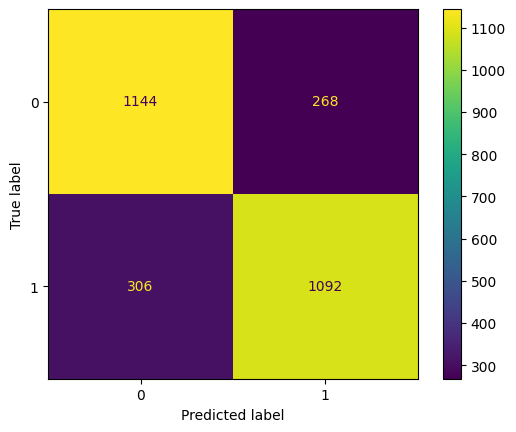

In [47]:
# compute the confusion matrix.
cm = confusion_matrix(Y_test, predictions)

 #Plot the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [58]:
new_text = pd.Series('Gago ang Astig!')
new_text_transform = vect.transform(new_text)
print("Verdict" ,nb.predict(new_text_transform))

Verdict [1]
